## Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy

## Data Loading and Preprocessing

In [ ]:
# Load data
data = pd.read_csv("/content/Filtered_Influencer_Descriptions.csv")
#data = result_head

In [ ]:
# Assuming 'data' is your DataFrame
data.drop('Rating', axis=1, inplace=True)


In [ ]:
data.head(5)

,Influencer ID,Influencer Username,Influencer Name,Influencer Description,Platform,Followers/Subscribers,Country,Age,Category,Number of Categories per Influencer,...,Shares,Brand Connection,Trend Index,Perceived Credibility,Commerciality,Interest,Willingness,Avg NOL last 5 posts,Avg NOL last 10 posts,Avg NOL last 50 posts
0,51283,brittany_lee,Brittany Lee,Brittany Lee is a engaging and informative Bea...,Instagram,174297,Australia,43,Beauty,1,...,4811,Medium,89.27,Medium,Low,3.46,6.88,1.356684e+06,1.206519e+06,1.185361e+06
1,87265,brandon_richards,Brandon Richards,Brandon Richards is a engaging and informative...,Instagram,805178,Australia,28,Gaming,3,...,345,Low,51.51,High,Low,4.11,7.03,1.835240e+05,2.616655e+05,2.242341e+05
2,24652,mary_russell,Mary Russell,Mary Russell is a insightful and expert-driven...,TikTok,6621136,Australia,40,Finance,2,...,175,Low,51.22,High,Low,9.94,8.99,6.508817e+05,8.094330e+05,7.631047e+05
3,34278,david_parker,David Parker,David Parker is a dynamic and highly engaging ...,TikTok,9463579,Australia,35,Fitness,2,...,3040,High,52.15,High,Low,4.75,5.06,3.544872e+05,3.159679e+05,3.110521e+05
4,81965,matthew_casey,Matthew Casey,Matthew Casey is a engaging and informative Be...,Instagram,1939304,Australia,37,Beauty,3,...,1374,Low,33.73,Low,Low,2.62,5.96,9.312044e+05,7.421566e+05,7.996276e+05


In [ ]:
data.dtypes

Influencer ID                             int64
Influencer Username                      object
Influencer Name                          object
Influencer Description                   object
Platform                                 object
Followers/Subscribers                     int64
Country                                  object
Age                                       int64
Category                                 object
Number of Categories per Influencer       int64
Budget per Post                         float64
Post Frequency                            int64
Sponsored Post Frequency                  int64
Engagement Trends (Last Year)           float64
Engagement Trends (Last Month)          float64
Post Success/Reach (Conversion Rate)    float64
Likes                                     int64
Comments                                  int64
Shares                                    int64
Brand Connection                         object
Trend Index                             

In [ ]:
# Check the categories in 'Commerciality' and their counts
commerciality_counts = data['Commerciality'].value_counts()

commerciality_counts

Commerciality
Medium    676
High      638
Low       632
Name: count, dtype: int64

## Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit the encoder and transform the 'Commerciality' column
data['Commerciality'] = le.fit_transform(data['Commerciality'])

In [ ]:
# Convert 'Brand Connection' and 'Perceived Credibility' to numerical values
data['Brand Connection'] = le.fit_transform(data['Brand Connection'])
data['Perceived Credibility'] = le.fit_transform(data['Perceived Credibility'])

## Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Select features excluding 'Rating'
features = ['Followers/Subscribers', 'Engagement Trends (Last Year)', 'Post Success/Reach (Conversion Rate)',
            'Likes', 'Comments', 'Shares', 'Brand Connection', 'Trend Index',
            'Perceived Credibility', 'Commerciality', 'Interest', 'Willingness']

# Preprocess features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_imputed)

# Add cluster information to the original data
data['Cluster'] = kmeans.labels_

# Define the cluster labels
cluster_labels = {0: 'medium', 1: 'high', 2: 'low'}

# Add the labels to the DataFrame
data['Value'] = data['Cluster'].map(cluster_labels)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print the updated DataFrame
data.shape

(1946, 30)

In [ ]:
# Print the first few rows of the DataFrame
data.head(20)


,Influencer ID,Influencer Username,Influencer Name,Influencer Description,Platform,Followers/Subscribers,Country,Age,Category,Number of Categories per Influencer,...,Trend Index,Perceived Credibility,Commerciality,Interest,Willingness,Avg NOL last 5 posts,Avg NOL last 10 posts,Avg NOL last 50 posts,Cluster,Value
0,51283,brittany_lee,Brittany Lee,Brittany Lee is a engaging and informative Bea...,Instagram,174297,Australia,43,Beauty,1,...,89.27,2,1,3.46,6.88,1.356684e+06,1.206519e+06,1.185361e+06,1,high
1,87265,brandon_richards,Brandon Richards,Brandon Richards is a engaging and informative...,Instagram,805178,Australia,28,Gaming,3,...,51.51,0,1,4.11,7.03,1.835240e+05,2.616655e+05,2.242341e+05,2,low
2,24652,mary_russell,Mary Russell,Mary Russell is a insightful and expert-driven...,TikTok,6621136,Australia,40,Finance,2,...,51.22,0,1,9.94,8.99,6.508817e+05,8.094330e+05,7.631047e+05,2,low
3,34278,david_parker,David Parker,David Parker is a dynamic and highly engaging ...,TikTok,9463579,Australia,35,Fitness,2,...,52.15,0,1,4.75,5.06,3.544872e+05,3.159679e+05,3.110521e+05,2,low
4,81965,matthew_casey,Matthew Casey,Matthew Casey is a engaging and informative Be...,Instagram,1939304,Australia,37,Beauty,3,...,33.73,1,1,2.62,5.96,9.312044e+05,7.421566e+05,7.996276e+05,2,low
5,65305,samantha_christensen,Samantha Christensen,Samantha Christensen is a engaging and informa...,YouTube,4732585,Australia,44,Music,3,...,22.19,0,1,1.37,6.44,1.235636e+06,1.175247e+06,1.124460e+06,2,low
6,98073,angela_hunter,Angela Hunter,Angela Hunter is a dynamic and highly engaging...,TikTok,4197991,Australia,35,Fitness,2,...,79.82,0,0,1.52,6.06,1.097610e+06,1.248141e+06,1.139997e+06,0,medium
7,61551,michael_ramos,Michael Ramos,Michael Ramos is a engaging and informative Be...,Instagram,6027750,Australia,28,Beauty,3,...,2.25,2,1,2.66,9.31,8.467048e+05,7.263917e+05,7.883883e+05,1,high
8,50196,danielle_graham,Danielle Graham,Danielle Graham is a engaging and informative ...,Instagram,6249097,Australia,27,Music,2,...,27.36,1,0,2.72,8.04,1.240514e+06,1.147827e+06,1.249310e+06,0,medium
9,76771,judith_garcia,Judith Garcia,Judith Garcia is a delicious and mouth-waterin...,Instagram,5413263,Australia,39,Food,1,...,11.25,1,0,6.88,6.87,9.677942e+05,1.333792e+06,1.181852e+06,0,medium


## Normalization and Rating Calculation

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit the encoder and transform the 'Value' column
data['Value'] = le.fit_transform(data['Value'])


In [ ]:
# Select the metrics you're interested in
metrics = ['Engagement Trends (Last Month)', 'Followers/Subscribers', 'Post Frequency', 'Post Success/Reach (Conversion Rate)', 'Value']

# Normalize these metrics to a scale of 0 to 1 and invert the scale
for metric in metrics:
    data[metric] = 1 - ((data[metric] - data[metric].min()) / (data[metric].max() - data[metric].min()))

# Calculate the average of the normalized metrics
data['Average'] = data[metrics].mean(axis=1)

# Multiply by 5 to get a rating on a 5-star scale
data['Rating'] = data['Average'] * 5

# Round the 'Rating' to the nearest whole number
data['Rating'] = data['Rating'].round().astype(int)

# Print the DataFrame to verify
data


,Influencer ID,Influencer Username,Influencer Name,Influencer Description,Platform,Followers/Subscribers,Country,Age,Category,Number of Categories per Influencer,...,Commerciality,Interest,Willingness,Avg NOL last 5 posts,Avg NOL last 10 posts,Avg NOL last 50 posts,Cluster,Value,Average,Rating
0,51283,brittany_lee,Brittany Lee,Brittany Lee is a engaging and informative Bea...,Instagram,0.982697,Australia,43,Beauty,1,...,1,3.46,6.88,1.356684e+06,1.206519e+06,1.185361e+06,1,1.0,0.808869,4
1,87265,brandon_richards,Brandon Richards,Brandon Richards is a engaging and informative...,Instagram,0.919598,Australia,28,Gaming,3,...,1,4.11,7.03,1.835240e+05,2.616655e+05,2.242341e+05,2,0.5,0.582322,3
2,24652,mary_russell,Mary Russell,Mary Russell is a insightful and expert-driven...,TikTok,0.337904,Australia,40,Finance,2,...,1,9.94,8.99,6.508817e+05,8.094330e+05,7.631047e+05,2,0.5,0.442302,2
3,34278,david_parker,David Parker,David Parker is a dynamic and highly engaging ...,TikTok,0.053611,Australia,35,Fitness,2,...,1,4.75,5.06,3.544872e+05,3.159679e+05,3.110521e+05,2,0.5,0.333523,2
4,81965,matthew_casey,Matthew Casey,Matthew Casey is a engaging and informative Be...,Instagram,0.806166,Australia,37,Beauty,3,...,1,2.62,5.96,9.312044e+05,7.421566e+05,7.996276e+05,2,0.5,0.614428,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,5576,lori_kelley,Lori Kelley,Lori Kelley is a dynamic and highly engaging F...,TikTok,0.345907,USA,35,Fitness,1,...,1,1.08,8.43,1.569717e+05,2.673549e+05,2.185430e+05,2,0.5,0.387503,2
1942,69021,anna_hahn,Anna Hahn,Anna Hahn is a engaging and informative Tech i...,Instagram,0.826102,USA,42,Tech,2,...,1,2.16,4.83,1.546022e+05,1.599159e+05,1.518139e+05,1,1.0,0.707984,4
1943,106335,jessica_boyd,Jessica Boyd,Jessica Boyd is a delicious and mouth-watering...,YouTube,0.640736,USA,45,Food,1,...,0,4.28,1.95,3.328871e+05,2.633185e+05,3.048570e+05,0,0.0,0.547116,3
1944,53112,ashley_frey,Ashley Frey,Ashley Frey is a engaging and informative Heal...,Instagram,0.257116,USA,45,Health,2,...,0,4.53,3.41,5.561979e+05,7.763399e+05,7.160785e+05,0,0.0,0.193983,1


## Cluster Analysis

In [ ]:
# Calculate the mean value of important features for each cluster
cluster_means = data.groupby('Cluster')[features].mean()

# Print the mean values
cluster_means

,Followers/Subscribers,Engagement Trends (Last Year),Post Success/Reach (Conversion Rate),Likes,Comments,Shares,Brand Connection,Trend Index,Perceived Credibility,Commerciality,Interest,Willingness
Cluster,,,,,,,,,,,,
0,0.503525,25.259459,0.493076,515810.907264,5026.885626,2444.406491,0.979907,53.327666,0.938176,0.013910,5.495688,5.282226
1,0.492751,28.392602,0.507088,483986.461654,5123.040602,2746.386466,1.147368,53.794195,1.639098,1.521805,5.852090,5.538030
2,0.502296,15.342855,0.468161,544198.017350,5230.493691,2271.212934,0.862776,48.026782,0.298107,1.518927,5.183091,5.561404


# Clustering Analysis Summary

## Cluster Descriptions

### Cluster 0
- *Followers/Subscribers*: Moderate.
- *Engagement Trends (Last Year)*: Moderate.
- *Post Success/Reach (Conversion Rate)*: Moderate.
- *Likes*: High.
- *Comments*: High.
- *Shares*: Moderate.
- *Brand Connection*: High.
- *Trend Index*: High.
- *Perceived Credibility*: High.
- *Commerciality*: Very Low.
- *Interest*: Moderate.
- *Willingness*: Moderate.

*Summary*:
Cluster 0 represents influencers with high engagement (likes, comments) and high perceived credibility. They have moderate commerciality and willingness, indicating they might not be highly commercialized but are credible and engaging.

### Cluster 1
- *Followers/Subscribers*: Moderate.
- *Engagement Trends (Last Year)*: High.
- *Post Success/Reach (Conversion Rate)*: High.
- *Likes*: Moderate.
- *Comments*: Moderate.
- *Shares*: High.
- *Brand Connection*: High.
- *Trend Index*: High.
- *Perceived Credibility*: Very High.
- *Commerciality*: High.
- *Interest*: High.
- *Willingness*: Moderate.

*Summary*:
Cluster 1 represents influencers who are highly commercialized and have high engagement trends and perceived credibility. They have moderate likes and comments but excel in shares, suggesting strong content dissemination.

### Cluster 2
- *Followers/Subscribers*: Moderate.
- *Engagement Trends (Last Year)*: Low.
- *Post Success/Reach (Conversion Rate)*: Moderate.
- *Likes*: High.
- *Comments*: High.
- *Shares*: Moderate.
- *Brand Connection*: Moderate.
- *Trend Index*: Moderate.
- *Perceived Credibility*: Low.
- *Commerciality*: High.
- *Interest*: Moderate.
- *Willingness*: High.

*Summary*:
Cluster 2 includes influencers with high commerciality but lower perceived credibility. They have high likes and comments, indicating good engagement but with a lower trend index and brand connection.

## Conclusion
- *Cluster 0*: These influencers are characterized by high engagement and high perceived credibility but low commerciality. They are likely to be more trusted and seen as organic by their audience.
- *Cluster 1*: These influencers offer a balance with high commerciality, high engagement trends, and strong content dissemination. They are suitable for commercial campaigns requiring credible and highly engaging influencers.
- *Cluster 2*: Influencers in this cluster show high engagement metrics but lower credibility and moderate trend index, suggesting they have a significant commercial influence but may be less trusted.

Each cluster highlights different strengths and weaknesses, helping in targeted influencer selection based on campaign needs. This segmentation allows brands to choose the right type of influencer for specific marketing goals, whether it's enhancing credibility, maximizing engagement, or balancing both.

## Clustering Labels

In [ ]:
# Define the cluster labels
cluster_labels = {0: 'medium', 1: 'high', 2: 'low'}

# Add the labels to the DataFrame
data['Value'] = data['Cluster'].map(cluster_labels)

# Print the number of influencers in each value category
data['Value'].value_counts()


Value
high      665
medium    647
low       634
Name: count, dtype: int64

## Visualization

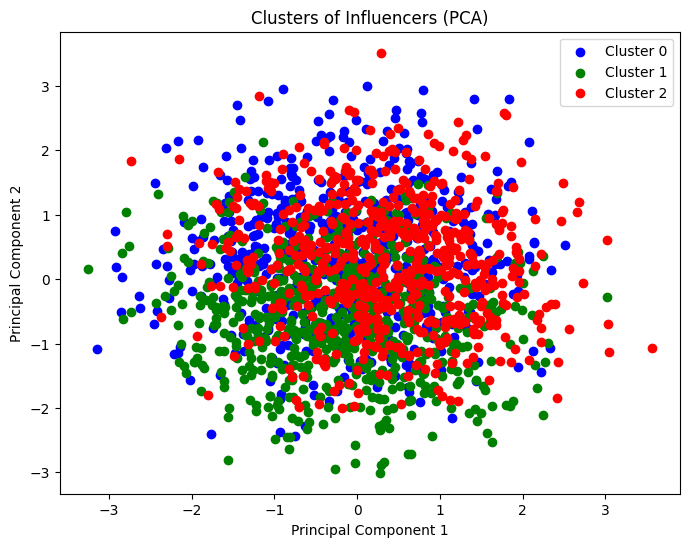

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA and transform data to 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for 2D data
data_pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])

# Add cluster information
data_pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8,6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.scatter(data_pca_df.loc[data_pca_df['Cluster'] == i, 'PC1'],
                data_pca_df.loc[data_pca_df['Cluster'] == i, 'PC2'],
                color=colors[i], label=f'Cluster {i}')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Influencers (PCA)')
plt.show()


In [ ]:
data.dtypes

Influencer ID                             int64
Influencer Username                      object
Influencer Name                          object
Influencer Description                   object
Platform                                 object
Followers/Subscribers                   float64
Country                                  object
Age                                       int64
Category                                 object
Number of Categories per Influencer       int64
Budget per Post                         float64
Post Frequency                          float64
Sponsored Post Frequency                  int64
Engagement Trends (Last Year)           float64
Engagement Trends (Last Month)          float64
Post Success/Reach (Conversion Rate)    float64
Likes                                     int64
Comments                                  int64
Shares                                    int64
Brand Connection                          int64
Trend Index                             

In [ ]:
# Check the size of the data
data_size = data.shape
print("Number of rows:", data_size[0])
print("Number of columns:", data_size[1])


Number of rows: 1946
Number of columns: 32


## Saving and Downloading Data

In [ ]:
from google.colab import files

# Save DataFrame to CSV
data.to_csv('data_without_rating.csv', index=False)

# Download the CSV file
files.download('data_without_rating.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Fake followers Detection

In [ ]:
# Group influencers by follower count
follower_count_groups = data.groupby('Followers/Subscribers')

# Initialize a list to store potential fake followers
potential_fake_followers = []

# Iterate over each follower count group
for follower_count, group_data in follower_count_groups:
    # If there are at least two influencers with the same follower count
    if len(group_data) >= 2:
        # Calculate average likes on last and second-to-last posts
        last_post_likes_avg = group_data['Likes'].iloc[-1:].mean()
        second_last_post_likes_avg = group_data['Likes'].iloc[-2:-1].mean()

        # Identify potential fake followers based on average likes comparison
        if last_post_likes_avg < second_last_post_likes_avg:
            potential_fake_followers.extend(group_data['Influencer ID'])

# Display potential fake followers
print("Potential Fake Followers:")
print(potential_fake_followers)


Potential Fake Followers:
[]


In [ ]:
# Display total count of potential fake followers
print("Total count of potential fake followers:", len(potential_fake_followers))


Total count of potential fake followers: 0


In [ ]:
 pip install pulp

In [ ]:
data["Value"].head()

0    high
1     low
2     low
3     low
4     low
Name: Value, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
lab = LabelEncoder()

# Perform label encoding on the 'team' column
data["Value"] = lab.fit_transform(data["Value"])


In [ ]:
data["Value"].head()

0    0
1    1
2    1
3    1
4    1
Name: Value, dtype: int64

Embedding, Information Extraction and Recommendation System with Linear Programming for Budget Optimization

In [ ]:
import pandas as pd
import torch
import pulp as pl
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
import spacy
import re
import numpy as np

# Load pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Load a pre-trained NLP model
nlp = spacy.load('en_core_web_sm')

# Function to calculate embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy().tolist()

# Function to extract information from user input
def extract_info(user_input):
    doc = nlp(user_input)
    country = next((ent.text for ent in doc.ents if ent.label_ == 'GPE'), None)
    age = re.findall(r'between (\d+) to (\d+)', user_input)
    age_description = user_input  # Default to the full input as description
    if age:
        age_description = re.sub(r'between (\d+) to (\d+)', '', age_description)  # Remove age range
    interest = next((ent.text for ent in doc.ents if ent.label_ == 'NORP'), None)
    industry = next((ent.text for ent in doc.ents if ent.label_ == 'ORG'), None)

    # Extract budget using regex
    budget_match = re.findall(r'\b(?:budget|spend)\b\s*(?:of|for)?\s*\$?(\d+(?:\.\d+)?)', user_input, re.IGNORECASE)
    budget = float(budget_match[0]) if budget_match else None

    categories = re.findall(r'category (\w+)', user_input)
    categories = ' and '.join(categories) if categories else None

    keywords = re.findall(r'\b(?:keyword|hashtag)\b\s*([a-zA-Z0-9_]+)', user_input, re.IGNORECASE)
    keywords = ' '.join(keywords) if keywords else None

    return country, budget, age, interest, industry, categories, keywords, age_description

def lp_optimize_selection(filtered_data, total_budget):
    # Convert to numeric to avoid type errors
    filtered_data['Value'] = pd.to_numeric(filtered_data['Value'], errors='raise')
    filtered_data['Budget per Post'] = pd.to_numeric(filtered_data['Budget per Post'], errors='raise')

    # Create the LP object
    model = pl.LpProblem("Maximize_Value", pl.LpMaximize)

    # Decision variables: 1 if the influencer is selected, 0 otherwise
    selection_vars = pl.LpVariable.dicts("Select", filtered_data.index, cat='Binary')

    # Objective Function: Maximize the sum of 'Value' weighted by selection
    model += pl.lpSum(selection_vars[i] * filtered_data.loc[i, 'Value'] for i in filtered_data.index)

    # Budget Constraint: Total spending must not exceed the budget
    model += pl.lpSum(selection_vars[i] * filtered_data.loc[i, 'Budget per Post'] for i in filtered_data.index) <= total_budget

    # Solve the model
    model.solve()

    # Collect selected influencers based on the LP solution
    selected_indices = [i for i in filtered_data.index if pl.value(selection_vars[i]) == 1]
    selected_influencers = filtered_data.loc[selected_indices]

    # Optionally sort and limit the output if required
    selected_influencers.sort_values(by='Value', ascending=False, inplace=True)
    return selected_influencers.head(10)  # Return top 10 recommendations based on Value

def recommend_influencers():
    user_input = input("Please enter the influencer description and keywords/hashtags: ")

    user_country, user_budget, _, user_interest, user_industry, user_categories, user_keywords, age_description = extract_info(user_input)

    # Convert inputs to appropriate data types
    if user_budget:
        user_budget = float(user_budget)

    # Calculate embeddings for all influencers
    data['Embedding'] = data['Influencer Description'].apply(get_embedding)

    # Filter influencers based on user inputs
    filtered_data = data.copy()
    if user_country:
        filtered_data = filtered_data[filtered_data['Country'].isin(user_country.split(' and '))]
    if user_budget:
        filtered_data = filtered_data[filtered_data['Budget per Post'] <= user_budget]
    if user_interest:
        filtered_data = filtered_data[filtered_data['Interest'] == user_interest]
    if user_industry:
        filtered_data = filtered_data[filtered_data['Category'] == user_category]
    if user_categories:
        filtered_data = filtered_data[filtered_data['Category'].str.contains(user_categories)]
    if user_keywords:
        filtered_data = filtered_data[filtered_data['Influencer Description'].str.contains(user_keywords, case=False)]

    if filtered_data.empty:
        return "No influencers found matching the criteria."

    # Calculate similarity scores
    user_embedding = np.array(get_embedding(age_description))  # Use age_description for embedding
    filtered_data['Similarity'] = filtered_data['Embedding'].apply(lambda x: cosine_similarity(np.array(x).reshape(1, -1), user_embedding.reshape(1, -1))[0][0])

    # Sort by similarity score and number of followers
    filtered_data.sort_values(by=['Similarity', 'Followers/Subscribers'], ascending=[False, False], inplace=True)

    # # Return top 10 recommendations that fit within the total budget
    # total_budget = user_budget if user_budget else float('inf')
    # top_recommendations = pd.DataFrame()
    # for idx, row in filtered_data.iterrows():
    #     if total_budget - row['Budget per Post'] >= 0:
    #         top_recommendations = pd.concat([top_recommendations, pd.DataFrame(row).T])
    #         total_budget -= row['Budget per Post']
    #     if len(top_recommendations) >= 10:
    #         break

    # # Sort the recommendations from high value to low value
    # top_recommendations.sort_values(by='Value', ascending=False, inplace=True)

    # return top_recommendations[['Influencer ID', 'Influencer Username', 'Influencer Name', 'Value', 'Budget per Post', 'Age', 'Rating']]
    # Apply LP optimization for final selection
    if not filtered_data.empty:
        # Apply LP optimization for final selection
        top_recommendations = lp_optimize_selection(filtered_data, user_budget)
        return top_recommendations[['Influencer ID', 'Influencer Username', 'Influencer Name', 'Value', 'Budget per Post', 'Age', 'Rating']]
    else:
        return "No influencers found matching the criteria."



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Test the recommendation system
display(recommend_influencers())

,Influencer ID,Influencer Username,Influencer Name,Value,Budget per Post,Age,Rating
6,98073,angela_hunter,Angela Hunter,2,3417.29,35,2
12,94878,barbara_figueroa,Barbara Figueroa,2,5210.38,26,2
8,50196,danielle_graham,Danielle Graham,2,4948.26,27,2
10,102418,lisa_galvan,Lisa Galvan,2,5644.46,48,2
9,76771,judith_garcia,Judith Garcia,2,8007.96,39,1
4,81965,matthew_casey,Matthew Casey,1,2001.76,37,3
2,24652,mary_russell,Mary Russell,1,3906.53,40,2
11,72251,laura_hale,Laura Hale,1,779.98,47,2
1,87265,brandon_richards,Brandon Richards,1,1159.50,28,3


## Deployment through Streamlit

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py

In [ ]:
! wget -q -O - ipv4.icanhazip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501